In [ ]:
import datetime
from pymongo import MongoClient
import pandas as pd
import numpy as np
from funaki.nba.forward_filtering import return_apm_prior

import matplotlib.pyplot as plt
import seaborn as sns

from adjustText import adjust_text

import sys
import os

In [2]:
client = MongoClient('mongodb://localhost:27017/')
db = client["Sports_NBA"]

# Current review 



In [21]:
apm_prior = return_apm_prior(db['funaki_ratings'], '2015-01-01', '2025-12-01')

In [56]:
apm_mean, apm_scale = apm_prior 
apm_mean = apm_mean * 100.

In [57]:
apm_mean.index = apm_mean.index.map(lambda val: val[:4] + '-' + val[4:6] + '-' + val[6:8])

In [58]:
cur_apm_vals = apm_mean.iloc[-1].sort_values(ascending=False) 

## Best offensive players

In [25]:
orapm_vals = cur_apm_vals[[indx for indx in cur_apm_vals.index if '_orapm' in indx]]
orapm_vals.rename({col: col.split('_')[0] for col in orapm_vals.index}, inplace=True)

In [26]:
orapm_vals.sort_values(ascending=False).head(20)

jokicni01    7.262848
gilgesh01    6.779239
curryst01    4.745953
antetgi01    4.706688
irvinky01    4.507449
garlada01    4.350146
allenja01    3.913055
mitchdo01    3.649048
paulch01     3.626336
butleji01    3.553709
bouchch01    3.484938
jamesle01    3.476097
lillada01    3.469545
edwaran01    3.403613
murraja01    3.399702
wagnefr01    3.301833
tatumja01    3.281698
kennalu01    3.277417
markkla01    3.229674
townska01    3.226165
Name: 2025-02-25, dtype: float64

## Best Defensive Players

In [27]:
drapm_vals = cur_apm_vals[[indx for indx in cur_apm_vals.index if '_drapm' in indx]]
drapm_vals.rename({col: col.split('_')[0] for col in drapm_vals.index}, inplace=True)

In [28]:
drapm_vals.sort_values(ascending=False).head(20)

leonaka01    4.983303
carusal01    4.690688
wadede01     4.505478
embiijo01    4.306490
tateja01     3.916055
joneshe01    3.748152
thompau01    3.635670
greendr01    3.626194
jokicni01    3.608085
lopezbr01    3.487684
whitede01    3.458942
capelca01    3.433075
gayru01      3.419908
harteis01    3.412982
covinro01    3.382999
balllo01     3.286469
harrito02    3.264443
goberru01    3.248908
davisan02    3.179162
mitchdo01    3.113483
Name: 2025-02-25, dtype: float64

No handles with labels found to put in legend.
               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0


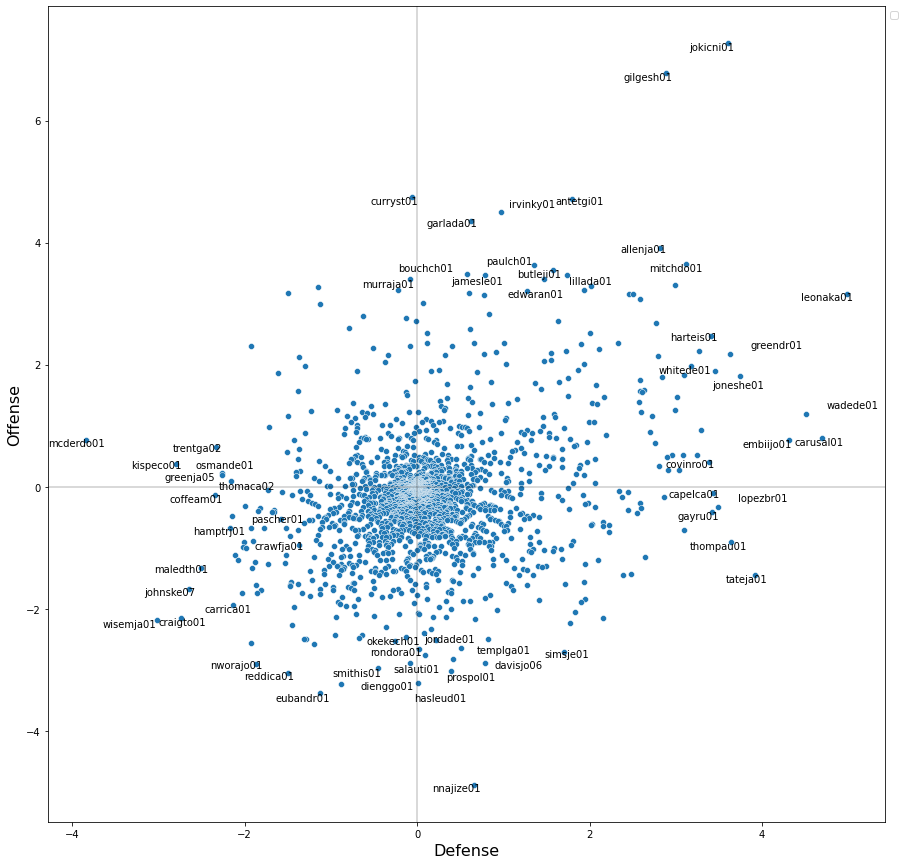

In [11]:
orapm_vals.name = 'Offense'
drapm_vals.name = 'Defense'

comb_df = pd.merge(orapm_vals, drapm_vals, left_index=True, right_index=True)
comb_df['Name'] = comb_df.index

plt.figure(figsize=(12,12))

sns.scatterplot(data=comb_df, 
                x='Defense', 
                y='Offense', 
                markers=True,
                legend=True,
                sizes=(20, 250))

plt.axvline(x=0.0, color='black', alpha=0.2)
plt.axhline(y=0.0, color='black', alpha=0.2)

padding=0.01
num_label=15
texts = []
players = []

for i, plyr in comb_df.sort_values('Offense', ascending=False).iloc[:num_label].iterrows():
    if plyr.Name not in players:
    #     plt.text(x=plyr.Defense+padding, y=plyr.Offense+padding, s=plyr.Name)
        texts.append(plt.text(x=plyr.Defense+padding, y=plyr.Offense+padding, s=plyr.Name))
        players.append(plyr.Name)
    
for i, plyr in comb_df.sort_values('Defense', ascending=False).iloc[:num_label].iterrows():
    if plyr.Name not in players:
    #     plt.text(x=plyr.Defense+padding, y=plyr.Offense+padding, s=plyr.Name)
        texts.append(plt.text(x=plyr.Defense+padding, y=plyr.Offense+padding, s=plyr.Name))
        players.append(plyr.Name)
    
for i, plyr in comb_df.sort_values('Offense', ascending=True).iloc[:num_label].iterrows():
    if plyr.Name not in players:
    #     plt.text(x=plyr.Defense+padding, y=plyr.Offense+padding, s=plyr.Name)
        texts.append(plt.text(x=plyr.Defense+padding, y=plyr.Offense+padding, s=plyr.Name))
        players.append(plyr.Name)
    
for i, plyr in comb_df.sort_values('Defense', ascending=True).iloc[:num_label].iterrows():
    if plyr.Name not in players:
    #     plt.text(x=plyr.Defense+padding, y=plyr.Offense+padding, s=plyr.Name)
        texts.append(plt.text(x=plyr.Defense+padding, y=plyr.Offense+padding, s=plyr.Name))
        players.append(plyr.Name)

plt.xlabel('Defense', fontsize=16);
plt.ylabel('Offense', fontsize=16);

plt.legend(loc = 'upper left', bbox_to_anchor=(1.0, 1.0))

adjust_text(texts
           )

plt.show()

In [36]:
apm_mean.shape

(12509, 4237)

In [43]:
apm_mean = apm_mean.loc[::5,:]

In [61]:
apm_mean

,iversal01_orapm,iguodan01_orapm,reddmi01_orapm,webbech01_orapm,korveky01_orapm,fordtj01_orapm,simmobo01_orapm,magloja01_orapm,bogutan01_orapm,salmojo01_orapm,...,brookke02_orapm,brookke02_drapm,roweja01_orapm,roweja01_drapm,baughda01_orapm,baughda01_drapm,tomlina01_orapm,tomlina01_drapm,colliyu01_orapm,colliyu01_drapm
id,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.164847,3.006222,0.553652,-0.34344,2.995022,-0.207564,-0.223478,0.881329,0.748115,-1.608986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,-0.164847,3.006222,0.553652,-0.34344,2.995022,-0.207564,-0.223478,0.881329,0.748115,-1.608986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.164847,3.006222,0.553652,-0.34344,2.995022,-0.207564,-0.223478,0.881329,0.748115,-1.608986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.164847,3.006222,0.553652,-0.34344,2.995022,-0.207564,-0.223478,0.881329,0.748115,-1.608986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.164847,3.006222,0.553652,-0.34344,2.995022,-0.207564,-0.223478,0.881329,0.748115,-1.608986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25,-0.057479,-0.349971,0.193046,-0.11975,0.432327,-0.072373,-0.077922,0.307300,-1.587062,-0.769970,...,-0.31665,0.030469,-0.005365,0.311594,-0.415191,-1.657759,-0.083736,-0.020527,-0.135875,-0.077132
2025-02-25,-0.057479,-0.349971,0.193046,-0.11975,0.432327,-0.072373,-0.077922,0.307300,-1.587062,-0.769970,...,-0.31665,0.030469,-0.005365,0.311594,-0.415191,-1.657759,-0.083736,-0.020527,-0.135875,-0.077132
2025-02-25,-0.057479,-0.349971,0.193046,-0.11975,0.432327,-0.072373,-0.077922,0.307300,-1.587062,-0.769970,...,-0.31665,0.030469,-0.005365,0.311594,-0.415191,-1.657759,-0.083736,-0.020527,-0.135875,-0.077132


In [50]:
np.max(apm_mean).sort_values()

hasleud01_orapm   -2.896388
bargnan01_drapm   -1.777735
hawessp01_orapm   -1.694771
mulleby01_drapm   -1.658601
nealga01_drapm    -1.469834
                     ...   
goberru01_drapm    6.579705
hardeja01_orapm    6.875474
gilgesh01_orapm    7.053807
jokicni01_orapm    7.296490
curryst01_orapm    8.073317
Length: 4237, dtype: float64

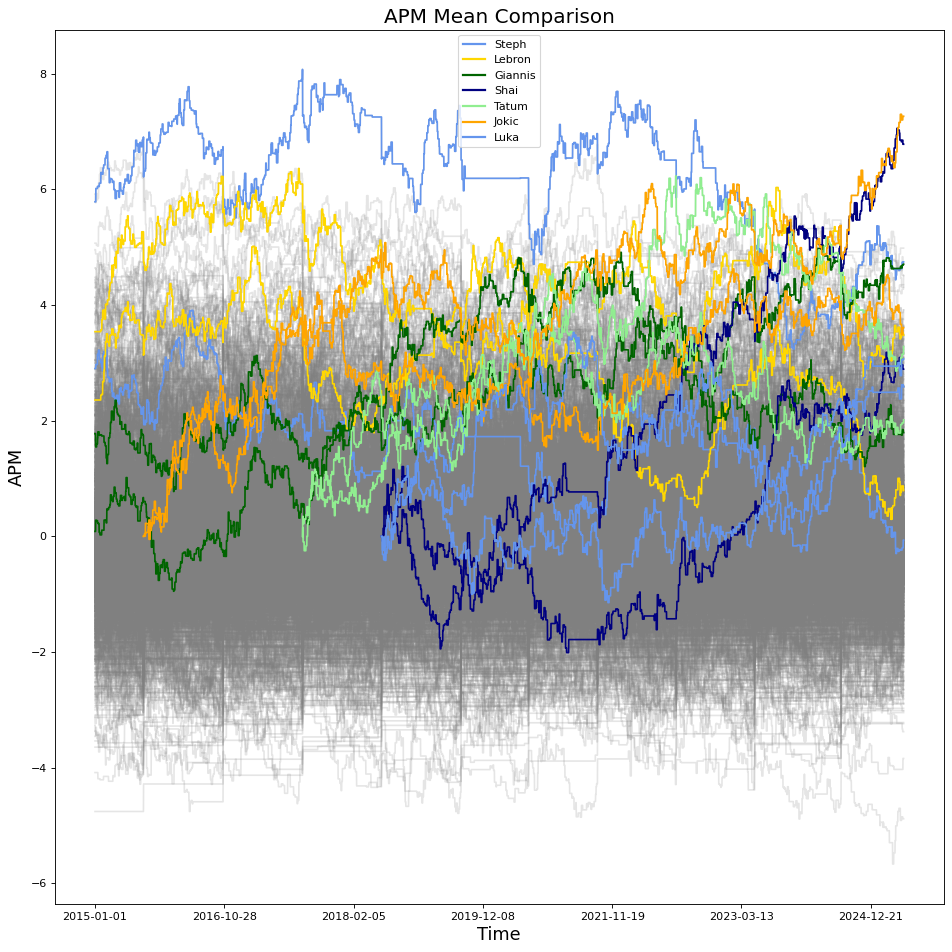

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12, 12), dpi=80)

# Plot the overall average in gray with transparency for context.
apm_mean.plot(ax=ax, legend=False, color='gray', alpha=0.2)

apm_mean['curryst01_orapm'].plot(ax=ax, legend=False, color='cornflowerblue')
apm_mean['curryst01_drapm'].plot(ax=ax, legend=False, color='cornflowerblue')

apm_mean['jamesle01_orapm'].plot(ax=ax, legend=False, color='gold')
apm_mean['jamesle01_drapm'].plot(ax=ax, legend=False, color='gold')

apm_mean['antetgi01_orapm'].plot(ax=ax, legend=False, color='darkgreen')
apm_mean['antetgi01_drapm'].plot(ax=ax, legend=False, color='darkgreen')

apm_mean['gilgesh01_orapm'].plot(ax=ax, legend=False, color='navy')
apm_mean['gilgesh01_drapm'].plot(ax=ax, legend=False, color='navy')

apm_mean['tatumja01_orapm'].plot(ax=ax, legend=False, color='lightgreen')
apm_mean['tatumja01_drapm'].plot(ax=ax, legend=False, color='lightgreen')

apm_mean['jokicni01_orapm'].plot(ax=ax, legend=False, color='orange')
apm_mean['jokicni01_drapm'].plot(ax=ax, legend=False, color='orange')

apm_mean['doncilu01_orapm'].plot(ax=ax, legend=False, color='cornflowerblue')
apm_mean['doncilu01_drapm'].plot(ax=ax, legend=False, color='cornflowerblue')

# Adjust tick parameters (use 'w' if using a dark background).
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Add title and labels.
ax.set_title('APM Mean Comparison', fontsize=18)
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('APM', fontsize=16)

legend_handles = [
    mlines.Line2D([], [], color='cornflowerblue', lw=2, label='Steph'),
    mlines.Line2D([], [], color='gold', lw=2, label='Lebron'),
    mlines.Line2D([], [], color='darkgreen', lw=2, label='Giannis'),
    mlines.Line2D([], [], color='navy', lw=2, label='Shai'),
    mlines.Line2D([], [], color='lightgreen', lw=2, label='Tatum'),
    mlines.Line2D([], [], color='orange', lw=2, label='Jokic'),
    mlines.Line2D([], [], color='cornflowerblue', lw=2, label='Luka')
]

# Add the custom legend to the axis.
ax.legend(handles=legend_handles, loc='best')

plt.tight_layout()
plt.show()

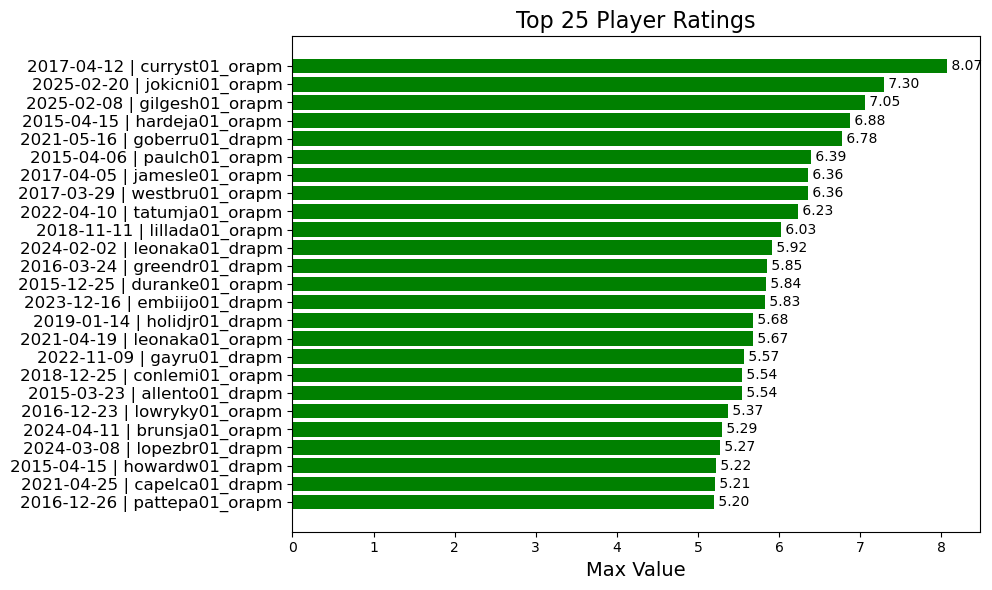

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your full dataframe is named 'df'
# Make sure df has proper datatypes for the index (e.g. datetime) if needed.
# Drop rows/columns that are entirely NaN, if appropriate:
df = apm_mean.dropna(how='all')

max_values = df.max()

# Compute the date (index) where each maximum occurs
max_dates = df.idxmax()

# Create a DataFrame with the player, max value, and corresponding date
df_max = pd.DataFrame({
    'player': max_values.index,
    'max_value': max_values.values,
    'date': max_dates.values
})

# Sort the DataFrame in descending order by the maximum value and take the top 10
df_top10 = df_max.sort_values('max_value', ascending=False).head(25)[::-1]

# Create labels that combine the date and player name
labels = [f"{row['date']} | {row['player']}" for _, row in df_top10.iterrows()]
values = df_top10['max_value'].values

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
# Use green for non-negative values and red for negative values
colors = ['green' if v >= 0 else 'red' for v in values]
plt.barh(range(len(values)), values, color=colors, align='center')
plt.yticks(range(len(values)), labels, fontsize=12)
plt.xlabel("Max Value", fontsize=14)
plt.title("Top 25 Player Ratings", fontsize=16)

# Annotate the bars with the numeric values
for i, v in enumerate(values):
    plt.text(v, i, f" {v:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

curryst01


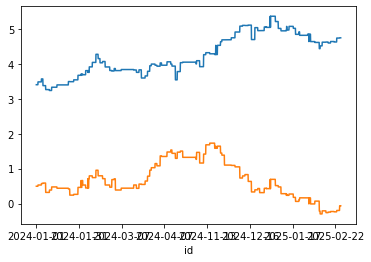

tatumja01


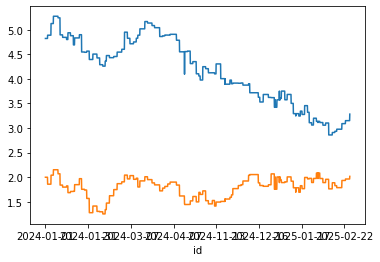

jokicni01


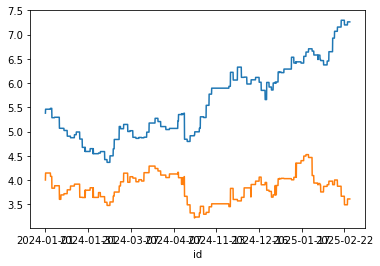

leonaka01


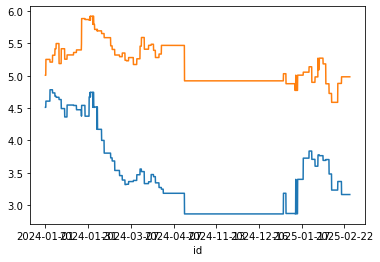

paulch01


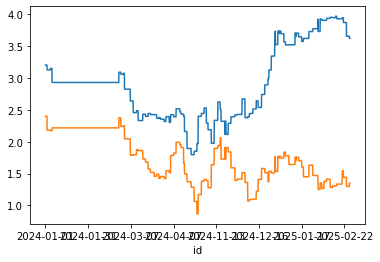

adamsst01


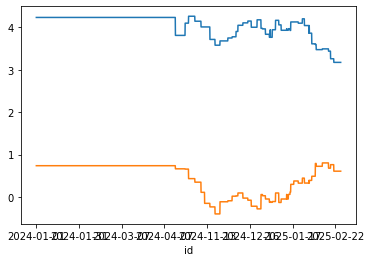

holidjr01


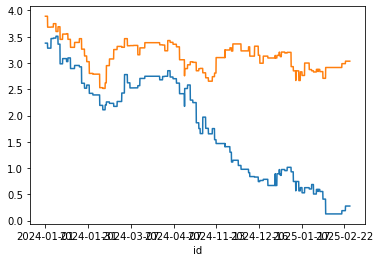

goberru01


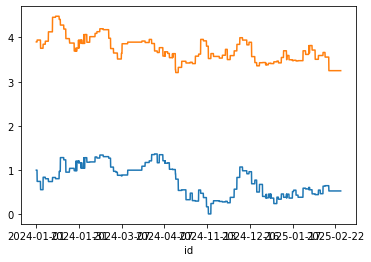

embiijo01


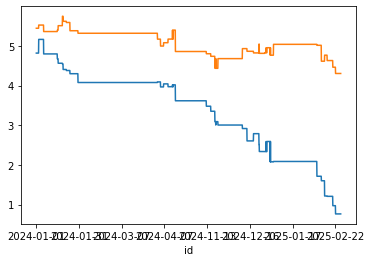

antetgi01


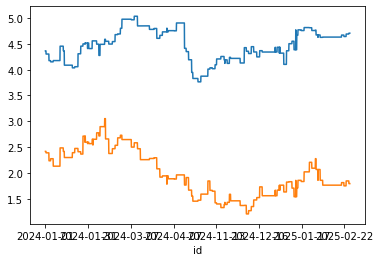

lillada01


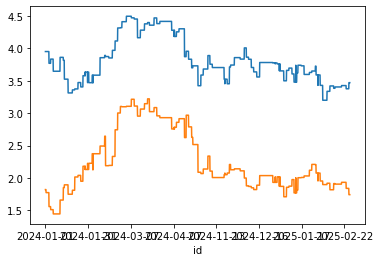

jamesle01


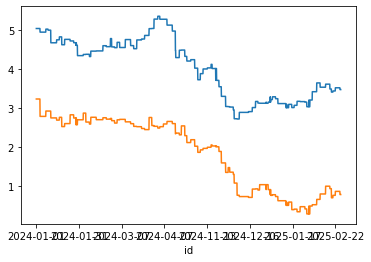

In [12]:
for plyr in ['curryst01', 'tatumja01', 'jokicni01', 'leonaka01', 'paulch01', 'adamsst01', 'holidjr01', 'goberru01', 'embiijo01', 'antetgi01', 'lillada01', 'jamesle01'
            ]:
    
    print(plyr)
    
    apm_mean[plyr + '_orapm'].plot()
    apm_mean[plyr + '_drapm'].plot()
    plt.show()

curryst01


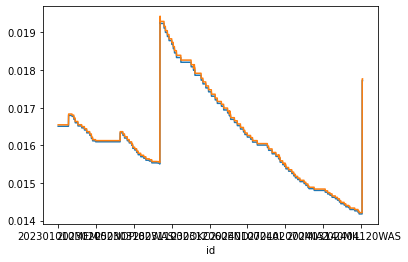

tatumja01


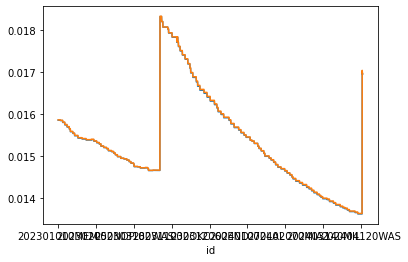

jokicni01


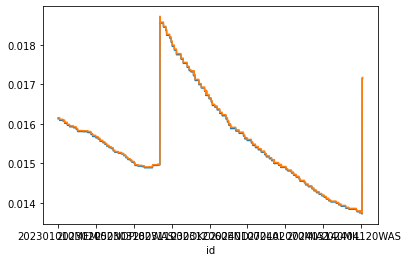

leonaka01


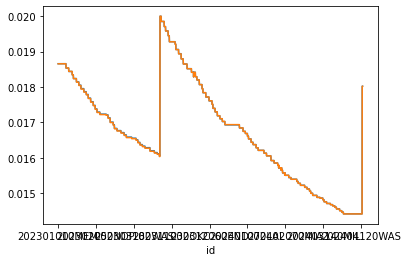

paulch01


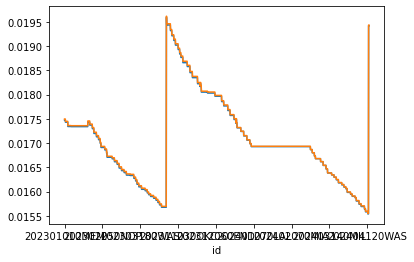

adamsst01


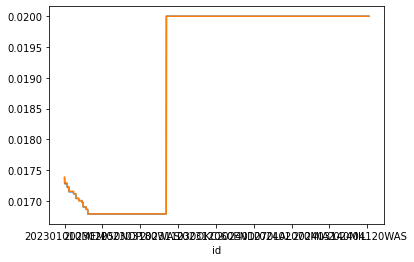

holidjr01


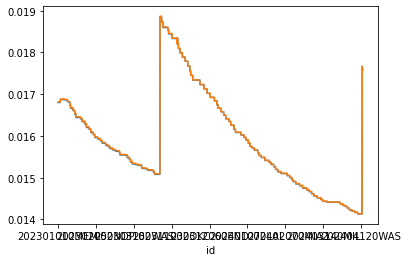

goberru01


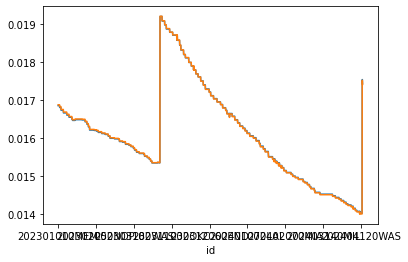

embiijo01


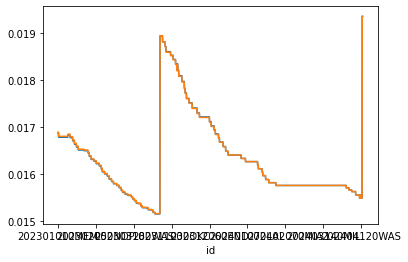

antetgi01


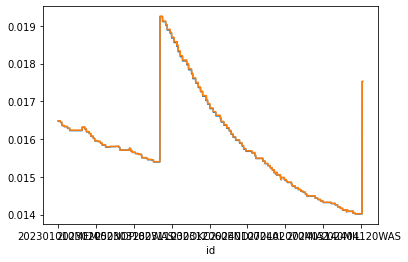

lillada01


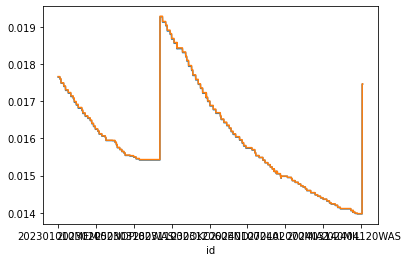

jamesle01


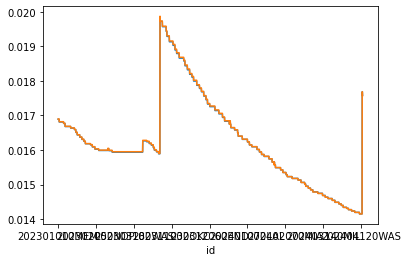

In [13]:
for plyr in ['curryst01', 'tatumja01', 'jokicni01', 'leonaka01', 'paulch01', 'adamsst01', 'holidjr01', 'goberru01', 'embiijo01', 'antetgi01', 'lillada01', 'jamesle01'
            ]:
    
    print(plyr)
    
    apm_scale[plyr + '_orapm'].plot()
    apm_scale[plyr + '_drapm'].plot()
    plt.show()

## Rookies

wembavi01


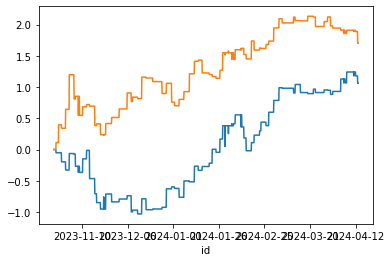

In [14]:
for plyr in ['wembavi01'
            ]:
    
    print(plyr)
    
    apm_mean[plyr + '_orapm'].plot()
    apm_mean[plyr + '_drapm'].plot()
    plt.show()